> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Analysis of Factors Affecting the Success of a Movie

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

We will first load the CSV file

In [3]:
#loading CSV file in to dataframe 'df'

df = pd.read_csv('no_show.csv')
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [5]:
df.ScheduledDay.min()

'2015-11-10T07:13:56Z'

In [6]:
df.ScheduledDay.max()

'2016-06-08T20:07:23Z'

Lets check the data types

In [3]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

We will also check for null values

In [4]:
#calculating the total number of of Null observations in each column

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### Data Cleaning

After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps in the second part of this section.

Lets Rename the column 'No-show' to 'No_show' for standardizing the names

In [4]:
df = df.rename(index=str, columns={"No-show": "No_show"})

In [6]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

Now that we've trimmed and cleaned our data, we're ready to move on to exploration. So, first of all we would like to see some stats and figures of the data that we wish to explore.

In [8]:
#count the number of No_shows

df.No_show.value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

### What factors are important in order to predict if a patient will show up for their scheduled appointment?

In [7]:
#checking the number of patients as per their respective gender 

df.Gender.value_counts(normalize=True)

F    0.649977
M    0.350023
Name: Gender, dtype: float64

Around 65% of the patients were Females and 35% were Males

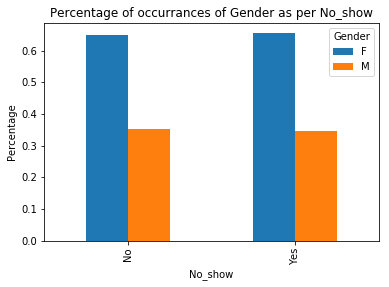

In [61]:
#checking the No_show population as per the gender of patients

ah = df.groupby('No_show').Gender.value_counts(normalize=True).unstack().plot(kind='bar',title='Percentage of occurrances of Gender as per No_show');
ah.set_ylabel("Percentage");

The ratio of males and Females were approximately equal for Show and No_show Patients

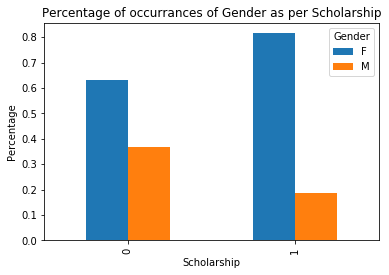

In [56]:
#checking if the scholarship into Bolsa Família has any correlation with Gender

ag = df.groupby('Scholarship').Gender.value_counts(normalize=True).unstack().plot(kind='bar',title='Percentage of occurrances of Gender as per Scholarship');
ag.set_ylabel("Percentage");

This indicates that more females are enrolled with Bolsa Família than males

In [10]:
#checking the total number of people enrolled in to Bolsa Família

df.Scholarship.value_counts(normalize=True)

0    0.901734
1    0.098266
Name: Scholarship, dtype: float64

There are Only 9.8266% of people enrolled with Bolsa Família

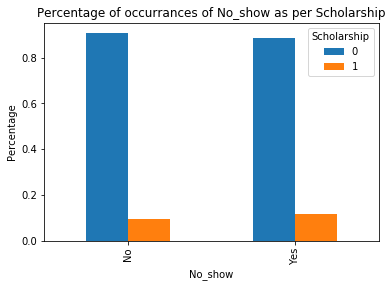

In [57]:
#checking if scholarship in to Bolsa Família asany correlation with No_show

af = df.groupby('No_show').Scholarship.value_counts(normalize=True).unstack().plot(kind='bar',title='Percentage of occurrances of No_show as per Scholarship');
af.set_ylabel("Percentage");

People who are enrolled in to Bolsa Família have a slightly higher chance of tagging a No-show to their Name

In [13]:
#checking if any patients have nore No_show than the others

df.groupby('No_show').PatientId.value_counts()

No_show  PatientId   
No       8.221459e+14    87
         9.963767e+10    80
         2.688613e+13    70
         3.353478e+13    65
         2.584244e+11    62
         7.579746e+13    60
         6.264199e+12    59
         8.713749e+14    59
         6.684488e+13    56
         8.722785e+11    54
         8.923969e+13    52
         8.435224e+09    51
         8.534397e+14    50
         6.543360e+13    45
         1.447997e+13    41
         9.452745e+12    40
         8.189452e+13    40
         1.882323e+14    38
         2.271580e+12    36
         1.336493e+13    35
         9.861628e+14    34
         8.883500e+13    33
         9.496197e+12    32
         7.124589e+14    32
         6.128878e+12    29
         1.484143e+12    28
         8.121397e+13    25
         4.167557e+14    25
         8.634164e+12    24
         3.699499e+13    20
                         ..
Yes      9.914896e+14     1
         9.916499e+14     1
         9.919675e+14     1
         9.923557e+14     

the patients seem to have the same number of No_show

Lets Check if the day of the week factors in No-show of patients

For this we will add a new column with the day of the week

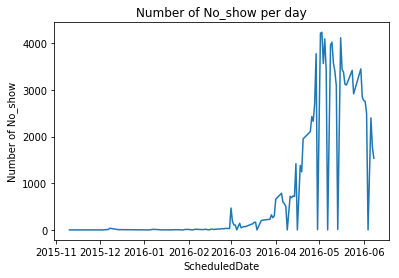

In [29]:
az = df.groupby('ScheduledDate').No_show.count().plot(kind='line',title='Number of No_show per day');
az.set_ylabel("Number of No_show");

In [20]:
date = pd.to_datetime(df.ScheduledDay) #converting ScheduledDay into a date time object and keeping the values with 'date'
df['day']=date.dt.weekday              #adding a new column 'day' and inserting the day of the week in it
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,ScheduledDate,AppointmentDate,Date_change,day
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,False,4


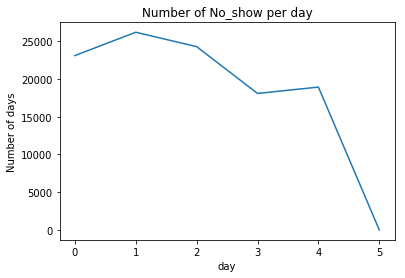

In [31]:
#checking the number of days of the week appointments were scheduled

ax = df.groupby('day').No_show.count().plot(kind='line',title='Number of No_show per day')
ax.set_ylabel("Number of days");

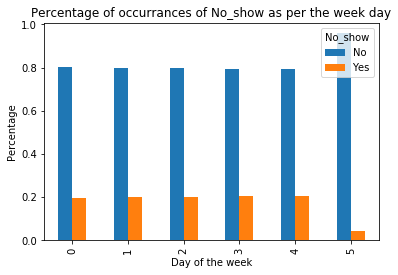

In [25]:
#checking if No_show has any correlation with day of the week

aa = df.groupby('day').No_show.value_counts(normalize=True).unstack().plot(kind='bar',title='Percentage of occurrances of No_show as per the week day');
aa.set_xlabel("Day of the week")
aa.set_ylabel("Percentage");

Day of the week doesn't seem to have an effect on the no show of patients. We would exclude the Saturday as the number of occurrances are low. However the percentage of no show on this day is 1/4 of the normal working days.

We can now check if the change in the apointment day from the scheduled day factors in the no show of patients.

For this we will create 2 columns with the date extracted out of ScheduledDay and AppointmentDay and create another column which shows if there has been a change in Scheduled day

In [8]:
a=pd.to_datetime(df.ScheduledDay)                      #converting ScheduledDay into a date time object and keeping the values with 'a'
b=pd.to_datetime(df.AppointmentDay)                    #converting AppointmentDay into a date time object and keeping the values with 'b'
df['ScheduledDate']=a.dt.date                          #creating a new column ScheduledDate and extracting out the date from ScheduledDay
df['AppointmentDate']=b.dt.date                        #creating a new column AppointmentDate and extracting out the date from AppointmentDay
df['Date_change']=df.ScheduledDate!=df.AppointmentDate #checking if there is any change in the two dates

the total number of appointment date changes are:

In [17]:
df['Date_change'].sum()

71964

In [9]:
#checking the correlation between No_show and date change

df.groupby('No_show').Date_change.value_counts()

No_show  Date_change
No       True           51437
         False          36771
Yes      True           20527
         False           1792
Name: Date_change, dtype: int64

Approximately 92% of the sheduled day changes resulted in no show of patients. This factor can be solely accounted for the most number of No shows of patients

Lets check the ailments of patients and their No show records to see a possible correlation.

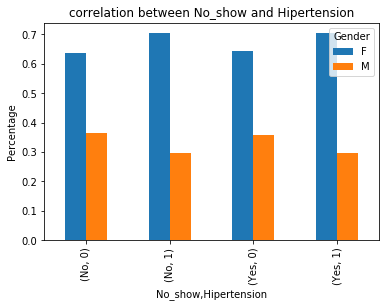

In [32]:
#checking the correlation between No_show and Hipertension

ab = df.groupby(['No_show','Hipertension']).Gender.value_counts(normalize=True).unstack().plot(kind='bar',title="correlation between No_show and Hipertension");
ab.set_ylabel("Percentage");

Hipertension shows same trends for the no show patients

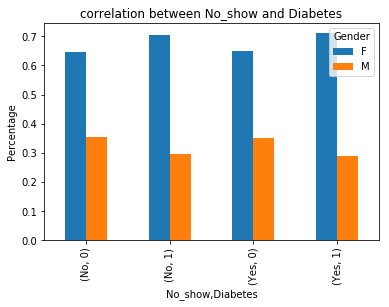

In [33]:
#checking the correlationbetween No_show and Diabetes

ac = df.groupby(['No_show','Diabetes']).Gender.value_counts(normalize=True).unstack().plot(kind='bar',title="correlation between No_show and Diabetes");
ac.set_ylabel("Percentage");

Hipertension shows same trends for the no show patients

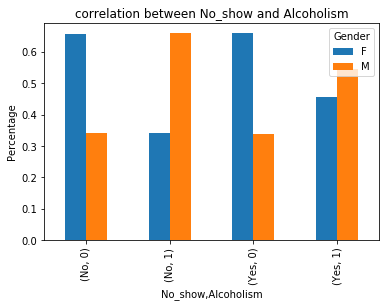

In [34]:
#checking the correlationbetween No_show and Alcoholism

ad = df.groupby(['No_show','Alcoholism']).Gender.value_counts(normalize=True).unstack().plot(kind='bar',title="correlation between No_show and Alcoholism");
ad.set_ylabel("Percentage");

Male patients with Alcoholism have a slightly higher chance of producing a No show

In [21]:
#checking the types of handicap patients although not explained in the data set

df.Handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

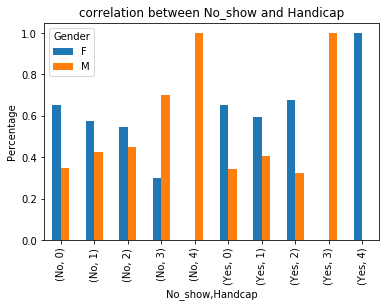

In [35]:
#checking the correlationbetween No_show and Handicap

ae = df.groupby(['No_show','Handcap']).Gender.value_counts(normalize=True).unstack().plot(kind='bar',title="correlation between No_show and Handicap");
ae.set_ylabel("Percentage");

certain unspecifed handicaped patients are more likely to produce a no show record

<a id='conclusions'></a>
## Conclusions

Various factors were tested out to see which factor is of the utmost importance in order to predict if a patient will show up for their scheduled appointment. It has been brough to light that the difference between the date of scheduling and the date of appointment has factored in the most while bringing out a strong correlation. 92% probability can in vague terms be considered as the factor affecting this prediction given the limitations of the data set while still not being definitely accurate for decision making situations for the company given the limitations of the data set.